In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df = pd.read_excel(r"C:\Users\HP\Desktop\Customer Churn Analysis\Data\Prediction_Data.xlsx")

print(df.shape)
print(df.info())
print(df.head())

(5000, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  5000 non-null   object 
 1   Gender                       5000 non-null   object 
 2   Age                          5000 non-null   int64  
 3   Married                      5000 non-null   object 
 4   State                        5000 non-null   object 
 5   Number_of_Referrals          5000 non-null   int64  
 6   Tenure_in_Months             5000 non-null   int64  
 7   Value_Deal                   2270 non-null   object 
 8   Phone_Service                5000 non-null   object 
 9   Multiple_Lines               5000 non-null   object 
 10  Internet_Service             5000 non-null   object 
 11  Internet_Type                3978 non-null   object 
 12  Online_Security              5000 non-null   object 
 13  Online_

In [3]:
df.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       5000 non-null   object 
 1   Age                          5000 non-null   int64  
 2   Married                      5000 non-null   object 
 3   State                        5000 non-null   object 
 4   Number_of_Referrals          5000 non-null   int64  
 5   Tenure_in_Months             5000 non-null   int64  
 6   Value_Deal                   2270 non-null   object 
 7   Phone_Service                5000 non-null   object 
 8   Multiple_Lines               5000 non-null   object 
 9   Internet_Service             5000 non-null   object 
 10  Internet_Type                3978 non-null   object 
 11  Online_Security              5000 non-null   object 
 12  Online_Backup                5000 non-null   object 
 13  Device_Protection_

In [4]:
df = df.fillna(df.median(numeric_only=True)) 
df = df.fillna("Unknown") 

In [5]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Encoding using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [6]:
# Feature Scaling
X = df.drop("Customer_Status", axis=1)
y = df["Customer_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Dimensionality Reduction with PCA
# Applying PCA to retain 95% variance
# pca = PCA(n_components=0.95)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced number of features: {X_pca.shape[1]}")

Reduced number of features: 10


In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [9]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Evaluating Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66       302
           1       0.84      0.90      0.87       698

    accuracy                           0.81      1000
   macro avg       0.78      0.75      0.76      1000
weighted avg       0.80      0.81      0.80      1000



#### Explanation:
Non-Churned (Active) 
- Precision 72%: Out of all customers predicted as "not churned", 72% were actually not churned.
- Recall 61%: Out of all actual non-churned customers, the model only found 61%.


Churned Customers  
- Precision 84%: Out of all customers predicted as "churned", 84% actually churned.
- Recall 90%: Out of all actual churned customers, the model correctly caught 90% 

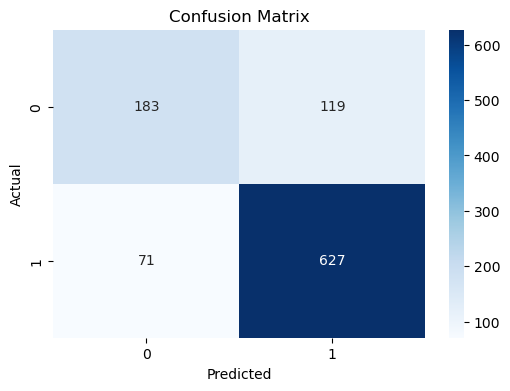

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

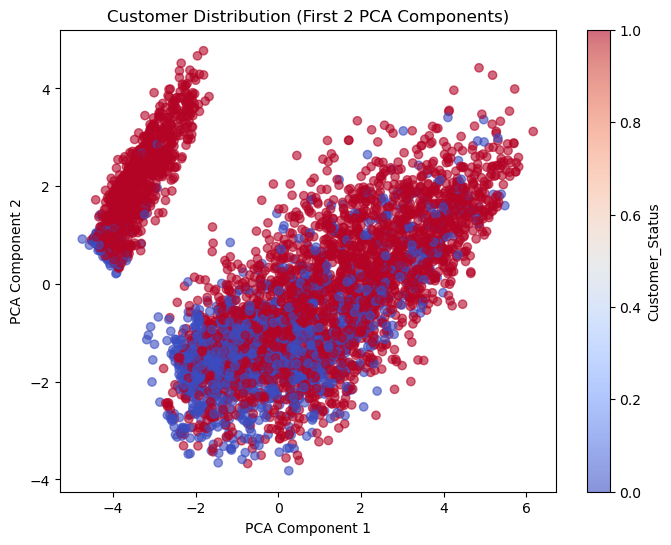

In [12]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Distribution (First 2 PCA Components)')
plt.colorbar(label='Customer_Status')
plt.show()

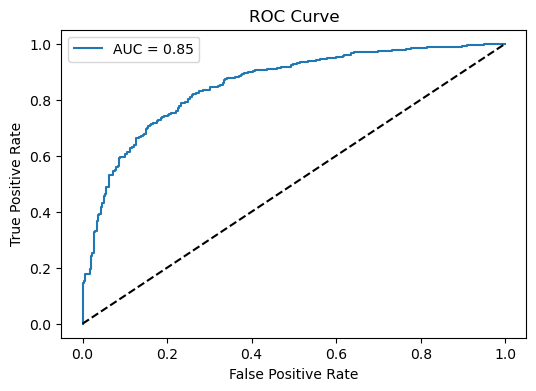

In [13]:
#ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Receiver Operating Characteristic (ROC)
- X-axis: False Positive Rate  – Proportion of non-churners incorrectly predicted as churners
- Y-axis: True Positive Rate (Recall) – proportion of actual churners correctly identified.

---

AUC = 0.85
- AUC stands for Area Under the Curve
- The closer AUC is to 1, the better your model is.
- An AUC of 0.85 means a model has 85% chance of correctly distinguishing a churned customer from a non-churned one.

---

The ROC curve shows that the model is capable of distinguishing churned customers with a high degree of accuracy. With an AUC of 0.85, the model performs very well, offering reliable predictions to support churn management decisions.